In [1]:
from operator import index

import pandas as pd
import folium
import seaborn as sns # pip install seaborn
import matplotlib.pyplot as plt
import plotly.express as px # pip install plotly

from collections import Counter
# from keplergl import KeplerGl

plt.rc('font', family='Malgun Gothic') # 한글 폰트 설정 (Malgun Gothic)

plt.rc('axes', unicode_minus=False) # 마이너스 기호 깨짐 방지

# 공용 변수 선언
dataIn = './../dataIn/'
dataOut = './../dataOut/'

In [65]:
# 이미 생성해 놓은 매장 정보 파일을 읽어 옵니다.
starbucks = pd.read_csv(dataOut + 'starbucks_file.csv')
ediya = pd.read_csv(dataOut + 'ediya_file.csv')
hollysBefore = pd.read_csv(dataOut + 'hollys_file.csv')
hollysBefore

,브랜드,상호,주소,시도,군구,위도,경도,전화번호,서비스
0,할리스,충무로역점,"서울특별시 중구 퇴계로36길 2 (필동2가, 동국대학교충무로영상센터)",서울특별시,중구,37.560644,126.993567,02-2268-8960,['주차']
1,할리스,FKI타워2호점,"서울특별시 영등포구 여의대로 24 (여의도동, 에프케이아이타워) 1층",서울특별시,영등포구,37.522180,126.919917,02-782-3647,['서비스 없음']
2,할리스,신대방삼거리역점,서울특별시 동작구 상도로 60 (대방동) 1층~2층,서울특별시,동작구,37.499561,126.927153,02-823-2377,['서비스 없음']
3,할리스,여의도포스트타워점,서울특별시 영등포구 여의나루로 60 포스트타워 여의도 1층,서울특별시,영등포구,37.522300,126.926225,02-2135-5321,['주차']
4,할리스,대림역점,서울특별시 영등포구 도림로 140 대림빌딩 101호,서울특별시,영등포구,37.493024,126.897628,02-834-1000,['테라스']
...,...,...,...,...,...,...,...,...,...
117,할리스,세종로점,"서울특별시 종로구 세종대로 161, 2~3층 (세종로 200) 할리스",서울특별시,종로구,37.570682,126.976267,02-720-5582,['흡연시설']
118,할리스,합정역점,서울특별시 마포구 양화로 36 (합정동 374-1) 할리스,서울특별시,마포구,37.548509,126.913338,02-6204-1234,['흡연시설']
119,할리스,신림점,서울특별시 관악구 신림로 353-1,서울특별시,관악구,37.485954,126.929242,02-877-0019,['서비스 없음']
120,할리스,태평로점,"서울특별시 중구 세종대로 64, 해남빌딩 1층 (태평로2가 70-5) 할리스.",서울특별시,중구,37.561973,126.976696,02-755-7795,['서비스 없음']


In [3]:
print(f'스타벅스 매장 갯수 : {len(starbucks)}')
print(f'이디야 매장 갯수 : {len(ediya)}')
print(f'할리스 매장 갯수 : {len(hollysBefore)}')

스타벅스 매장 갯수 : 666
이디야 매장 갯수 : 474
할리스 매장 갯수 : 122


In [4]:
starbucks.columns

Index(['브랜드', '상호', '주소', '시도', '군구', '위도', '경도'], dtype='object')

In [5]:
ediya.columns

Index(['브랜드', '상호', '주소', '시도', '군구', '위도', '경도'], dtype='object')

In [6]:
hollysBefore.columns

Index(['브랜드', '상호', '주소', '시도', '군구', '위도', '경도', '전화번호', '서비스'], dtype='object')

In [7]:
common_col = starbucks.columns.intersection(hollysBefore.columns)
common_col

Index(['브랜드', '상호', '주소', '시도', '군구', '위도', '경도'], dtype='object')

In [8]:
hollys = hollysBefore[common_col]
hollys.columns

Index(['브랜드', '상호', '주소', '시도', '군구', '위도', '경도'], dtype='object')

In [9]:
print('# 각 매장의 데이터 프레임을 하바로 모아줍니다.')
coffeeFrame = pd.concat([starbucks,ediya,hollys], axis= 0)
print(f'전체 매장 갯수 : {len(coffeeFrame)}')

# 각 매장의 데이터 프레임을 하바로 모아줍니다.
전체 매장 갯수 : 1262


In [10]:
filename = dataOut + 'coffee_list.csv'
coffeeFrame.to_csv(filename, index= False, encoding= 'UTF-8')
print(f'{filename} 파일이 저장되었습니다.')

./../dataOut/coffee_list.csv 파일이 저장되었습니다.


In [11]:
coffeeFrame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1262 entries, 0 to 121
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   브랜드     1262 non-null   object 
 1   상호      1262 non-null   object 
 2   주소      1262 non-null   object 
 3   시도      1262 non-null   object 
 4   군구      1262 non-null   object 
 5   위도      1260 non-null   float64
 6   경도      1260 non-null   float64
dtypes: float64(2), object(5)
memory usage: 78.9+ KB


In [12]:
# notnull() 함수는 결측지가 아니면 True를 반환해주는 함수 <-> isnull()
print(f'위도/경도 결측지 제거전 : {len(coffeeFrame)}')
mapFrame = coffeeFrame[coffeeFrame['위도'].notnull()]

위도/경도 결측지 제거전 : 1262


In [13]:
print(f'위도/경도 결측지 제거후 : {len(mapFrame)}')

위도/경도 결측지 제거후 : 1260


In [14]:
# 지도 위에 매장 표시
# folium에서 사용할 브랜드별 색상 지정
brand_color = {
    '스타벅스' : 'beige',
    '이디야' : 'darkpurple',
    '할리스' : 'lightblue',
}
seoul_center = [mapFrame['위도'].mean(), mapFrame['경도'].mean()] # 서울 중심 위치
seoul_center

[np.float64(37.541941975611785), np.float64(126.98842106436308)]

In [15]:
# 서울 지도 객체
seoul_map = folium.Map(location= seoul_center, zoom_start=11)
# iterrows() : iterable rows(전체 행을 반복)
# for 색인_번호, 데이터_1행 in mapFrame.iterrows():
# 찾아 볼것 : 마커 크기 조정, popup의 모양
for _, row in mapFrame.iterrows():
    folium.Marker(
        location=[row['위도'],row['경도']],
        popup=f"{row['상호']}({row['브랜드']})", # 팝업 예시 : xxx점(스타벅스)
        icon=folium.Icon(color=brand_color.get(row['브랜드'], 'gray'))
    ).add_to(seoul_map)

htmlfile = dataOut + 'coffee_map.html'
seoul_map.save(htmlfile)
print(f'{htmlfile} 파일 생성')


./../dataOut/coffee_map.html 파일 생성


In [16]:
seoul_map

In [17]:
print('# 군구 컬럼이 마포구, 용산구, 서대문구인 항목들만 추출')
concern_gu = ['마포구', '용산구', '서대문구']
myfilter01 = mapFrame[mapFrame['군구'].isin(concern_gu)]
print(len(myfilter01))

# 군구 컬럼이 마포구, 용산구, 서대문구인 항목들만 추출
153


In [18]:
my_center = [myfilter01['위도'].mean(), myfilter01['경도'].mean()] # 서울 중심 위치
my_center
# 서울 지도 객체
filter_map = folium.Map(location= my_center, zoom_start=13, tiles='OpenStreetMap')
# iterrows() : iterable rows(전체 행을 반복)
# for 색인_번호, 데이터_1행 in myfilter01.iterrows():
# 찾아 볼것 : 마커 크기 조정, popup의 모양
for _, row in myfilter01.iterrows():
    ic_color = 'white'
    folium.Marker(
        location=[row['위도'],row['경도']],
        popup=row['주소'],
        tooltip=f"{row['상호']}({row['브랜드']})", # 팝업 예시 : xxx점(스타벅스)
        icon=folium.Icon(
            color=brand_color.get(row['브랜드'], 'gray'),
            icon_color=ic_color,
            icon='coffee',
            prefix='fa'
                         )
    ).add_to(filter_map)

htmlfile = dataOut + 'coffee_map2.html'
seoul_map.save(htmlfile)
print(f'{htmlfile} 파일 생성')

./../dataOut/coffee_map2.html 파일 생성


In [19]:
filter_map

In [22]:
# Plotly로 인터랙티브 지도 시각화
fig  = px.scatter_map(
    mapFrame, lat='위도', lon='경도', color='브랜드', hover_name='상호', zoom=11, map_style='open-street-map'
)
fig.show()

In [21]:
mapFrame.columns

Index(['브랜드', '상호', '주소', '시도', '군구', '위도', '경도'], dtype='object')

In [37]:
coffeeFrame.head()

,브랜드,상호,주소,시도,군구,위도,경도
0,스타벅스,리저브 매장 2번,서울특별시 강남구 언주로 425 (역삼동)1522-3232,서울특별시,강남구,37.501087,127.043069
1,스타벅스,리저브 매장 2번,서울특별시 강남구 강남대로 538 (논현동)1522-3232,서울특별시,강남구,37.510178,127.022223
2,스타벅스,리저브 매장 2번,서울특별시 강남구 강남대로 584 (논현동)1522-3232,서울특별시,강남구,37.513931,127.020606
3,스타벅스,리저브 매장 2번,서울특별시 강남구 테헤란로 125 (역삼동)1522-3232,서울특별시,강남구,37.499517,127.031495
4,스타벅스,리저브 매장 2번,서울특별시 강남구 남부순환로 2947 (대치동)1522-3232,서울특별시,강남구,37.494668,127.062583


In [24]:
# 차트 그리기 시작
mycolor = ['green','blue','red']

In [26]:
chart_data = coffeeFrame['브랜드'].value_counts()
chart_data.to_frame()

,count
브랜드,
스타벅스,666
이디야,474
할리스,122


In [27]:
plt.figure(figsize=(6,6)) # 도화지 준비, 차트를 새로 그릴때는 figure를 새로 선언해서 이전의 그래프와 겹치지 않게 해야함

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Axes: ylabel='count'>

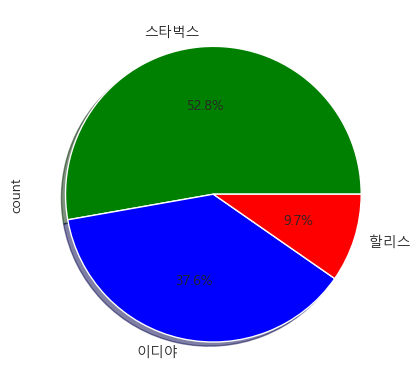

In [36]:
chart_data.plot(kind='pie', autopct='%.1f%%', colors= mycolor) # shadow=True, explode=(0,0.01,0)
plt.ylabel('') # y축의 라벨 제거
plt.savefig(dataOut + 'coffee_01.png')

In [38]:
# 계수기(counter) 사용
brand_counts = Counter(coffeeFrame['브랜드'])
brand_counts

Counter({'스타벅스': 666, '이디야': 474, '할리스': 122})

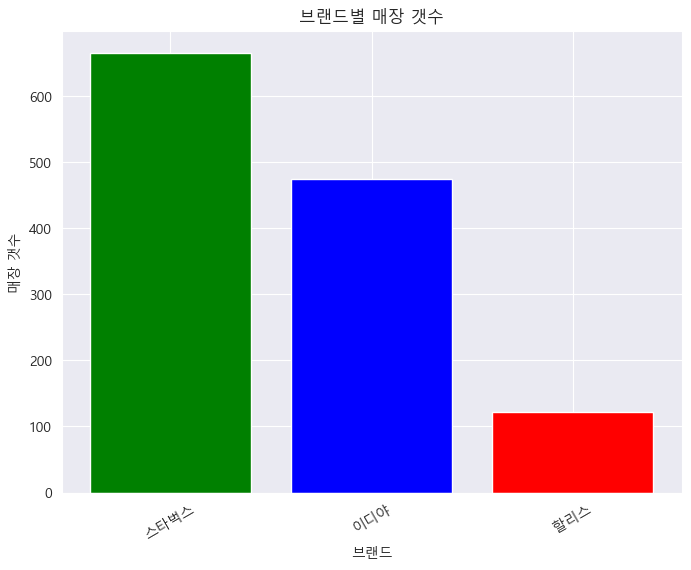

In [41]:
plt.figure(figsize=(8,6))
plt.bar(brand_counts.keys(), brand_counts.values(), color=mycolor)

plt.title('브랜드별 매장 갯수', size=20)
plt.xlabel('브랜드', size=13)
plt.ylabel('매장 갯수', size=13)
plt.xticks(rotation=30)
plt.savefig(dataOut + 'coffee_02.png')

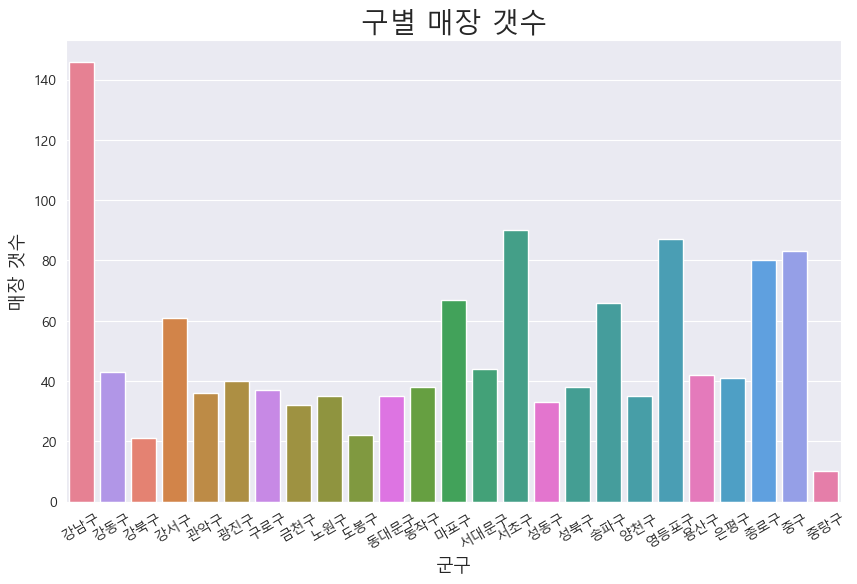

In [50]:
plt.figure(figsize=(10,6))
myorder = sorted(coffeeFrame['군구'].value_counts().index)
sns.countplot(data=coffeeFrame, x='군구', order=myorder, hue='군구')
plt.title('구별 매장 갯수', size=20)
plt.xlabel('군구', size=13)
plt.ylabel('매장 갯수', size=13)
plt.xticks(rotation=30)
plt.savefig(dataOut + 'coffee_03.png')

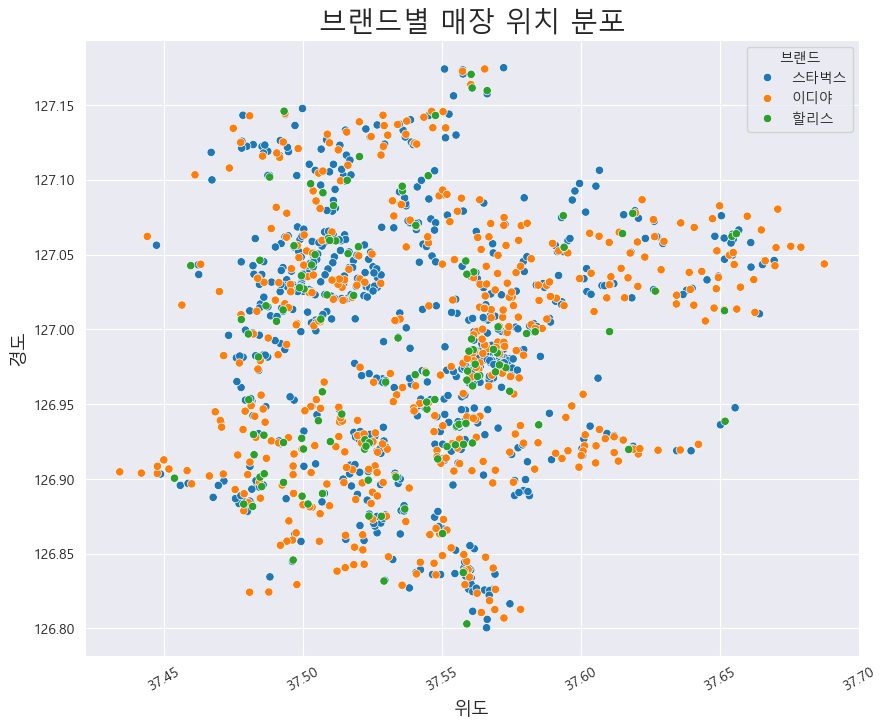

In [55]:
plt.figure(figsize=(10,8))
# scatterplot 함수는 두개의 연속형 데이터 사이의 관계를 점으로 그려 주는 그래프
sns.scatterplot(data=mapFrame, x='위도', y='경도',  hue='브랜드')

plt.title('브랜드별 매장 위치 분포', size=20)
plt.xlabel('위도', size=13)
plt.ylabel('경도', size=13)
plt.xticks(rotation=30)
plt.savefig(dataOut + 'coffee_04.png')

In [56]:
# 구별, 브랜드별 점유율
gu_brand_data = coffeeFrame.groupby(['군구','브랜드'])
gu_brand_data

In [60]:
# 중첩된 색인을 단일 색익으로 변경하고, 누락이 된 데이터는 0으로 채워주세요.
# unstack() 함수는 중첩된 색인을, 2차원 형식의 표(pivot) 형태로 변경시켜 줍니다.
gu_brand_chart = gu_brand_data.size().unstack(fill_value=0)
gu_brand_chart

브랜드,스타벅스,이디야,할리스
군구,,,
강남구,98,33,15
강동구,20,19,4
강북구,7,12,2
강서구,32,26,3
관악구,14,18,4
광진구,23,13,4
구로구,13,18,6
금천구,15,14,3
노원구,15,16,4


<Figure size 1200x800 with 0 Axes>

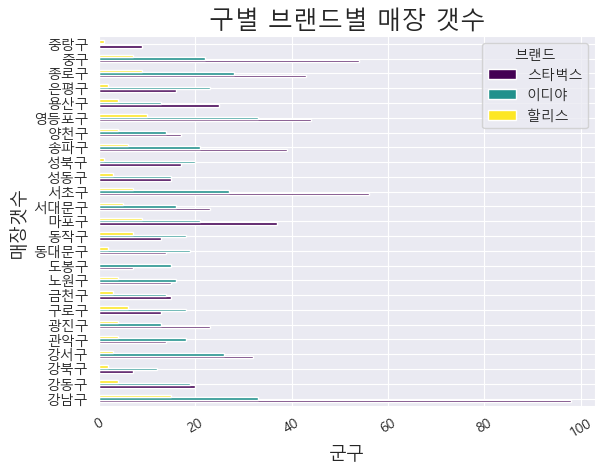

In [62]:
plt.figure(figsize=(12,8))

gu_brand_chart.plot(kind='barh', colormap='viridis')

plt.title('구별 브랜드별 매장 갯수', size=18)
plt.xlabel('군구', size=13)
plt.ylabel('매장갯수', size=13)
plt.xticks(rotation=30)
plt.legend(title='브랜드')
plt.savefig(dataOut + 'coffee_06.png')

<Figure size 1200x800 with 0 Axes>

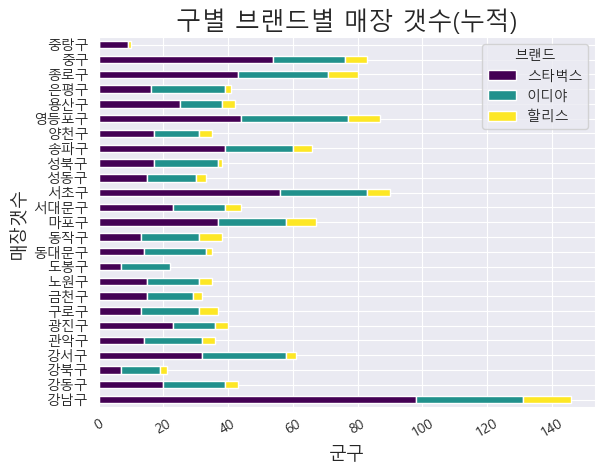

In [63]:
plt.figure(figsize=(12,8))

gu_brand_chart.plot(kind='barh', colormap='viridis', stacked=True)

plt.title('구별 브랜드별 매장 갯수(누적)', size=18)
plt.xlabel('군구', size=13)
plt.ylabel('매장갯수', size=13)
plt.xticks(rotation=30)
plt.legend(title='브랜드')
plt.savefig(dataOut + 'coffee_06.png')

In [ ]:
# 할리스 편의 서비스 정보
# 편의 서비스를 하나도 제공하지 않는 매장 정보
# 2개 이상의 서비스를 제공하는 매장 정보
# 2개 이상의 서비스를 제공하는 곳 중에서 가장 많은 구 정보

In [67]:
# 편의 서비스 관련 컬럼 리스트
service_columns = ['상호','서비스']
hollysBefore[service_columns].head()

,상호,서비스
0,충무로역점,['주차']
1,FKI타워2호점,['서비스 없음']
2,신대방삼거리역점,['서비스 없음']
3,여의도포스트타워점,['주차']
4,대림역점,['테라스']


In [72]:
# 파생 컬럼 추가 : 서비스 제공 개수
# 먼저 개수 계산
import ast

# 문자열인 경우만 literal_eval로 리스트 변환
def to_list(x):
    if isinstance(x, str):
        return ast.literal_eval(x)
    return x

hollysBefore['서비스'] = hollysBefore['서비스'].apply(to_list)

# ['서비스 없음'] → 빈 리스트로 치환
hollysBefore['서비스'] = hollysBefore['서비스'].apply(
    lambda lst: [] if lst == ['서비스 없음'] else lst
)

hollysBefore['서비스 제공개수'] = hollysBefore['서비스'].str.len()

hollysBefore

,브랜드,상호,주소,시도,군구,위도,경도,전화번호,서비스,서비스 제공개수
0,할리스,충무로역점,"서울특별시 중구 퇴계로36길 2 (필동2가, 동국대학교충무로영상센터)",서울특별시,중구,37.560644,126.993567,02-2268-8960,[주차],1
1,할리스,FKI타워2호점,"서울특별시 영등포구 여의대로 24 (여의도동, 에프케이아이타워) 1층",서울특별시,영등포구,37.522180,126.919917,02-782-3647,[],0
2,할리스,신대방삼거리역점,서울특별시 동작구 상도로 60 (대방동) 1층~2층,서울특별시,동작구,37.499561,126.927153,02-823-2377,[],0
3,할리스,여의도포스트타워점,서울특별시 영등포구 여의나루로 60 포스트타워 여의도 1층,서울특별시,영등포구,37.522300,126.926225,02-2135-5321,[주차],1
4,할리스,대림역점,서울특별시 영등포구 도림로 140 대림빌딩 101호,서울특별시,영등포구,37.493024,126.897628,02-834-1000,[테라스],1
...,...,...,...,...,...,...,...,...,...,...
117,할리스,세종로점,"서울특별시 종로구 세종대로 161, 2~3층 (세종로 200) 할리스",서울특별시,종로구,37.570682,126.976267,02-720-5582,[흡연시설],1
118,할리스,합정역점,서울특별시 마포구 양화로 36 (합정동 374-1) 할리스,서울특별시,마포구,37.548509,126.913338,02-6204-1234,[흡연시설],1
119,할리스,신림점,서울특별시 관악구 신림로 353-1,서울특별시,관악구,37.485954,126.929242,02-877-0019,[],0
120,할리스,태평로점,"서울특별시 중구 세종대로 64, 해남빌딩 1층 (태평로2가 70-5) 할리스.",서울특별시,중구,37.561973,126.976696,02-755-7795,[],0


In [74]:
print('# 편의 서비스 제공을 하나도 하지않는 매장')
no_service_stores = hollysBefore[hollysBefore['서비스 제공개수']==0]
# no_service_stores[service_columns].head(30)

filename = dataOut + 'hollys_no_service_stores.csv'
no_service_stores.to_csv(filename, index=False, encoding='UTF-8')
print(f'{filename} 파일이 저장되었습니다.')

# 편의 서비스 제공을 하나도 하지않는 매장
./../dataOut/hollys_no_service_stores.csv 파일이 저장되었습니다.


In [75]:
print('# 2개 이상의 편의 서비스를 제공하는 매장')
multiple_service_stores = hollysBefore[hollysBefore['서비스 제공개수']>=2]

filename = dataOut + 'hollys_multiple_service_stores.csv'
no_service_stores.to_csv(filename, index=False, encoding='UTF-8')
print(f'{filename} 파일이 저장되었습니다.')

# 2개 이상의 편의 서비스를 제공하는 매장
./../dataOut/hollys_multiple_service_stores.csv 파일이 저장되었습니다.


In [77]:
# 군구별 서비스 제공 개수의 그룸핑 객체
condition = multiple_service_stores.groupby('군구')['서비스 제공개수']
type(condition)

pandas.core.groupby.generic.SeriesGroupBy

In [78]:
# idxmax() 함수는 값이 가장 큰 항목의 색인 정보를 반환함. 반대 함수는 idxmin*(
print(f'구별 서비스 제공 갯수의 총합이 가장 큰 구 : {condition.sum().idxmax()}')

구별 서비스 제공 갯수의 총합이 가장 큰 구 : 동작구


In [79]:
print(f'구별 서시브 제공 갯수의 총합이 가장 큰 구 : {condition.sum().idxmax()}')

구별 서시브 제공 갯수의 총합이 가장 큰 구 : 동작구


In [80]:
top05 = condition.sum().sort_values(ascending=False).head(n=5)
top05

군구
동작구    8
강동구    4
강남구    4
중구     4
구로구    4
Name: 서비스 제공개수, dtype: int64

In [86]:
# mode() 함수는 최빈도를 구해주는 함수 입니다,
most_common_gu = multiple_service_stores['군구'].mode()[0]
print(f'2개 이상의 서비스 제공의 총합이 가장 많은 구 : {most_common_gu}')

2개 이상의 서비스 제공의 총합이 가장 많은 구 : 동작구


In [87]:
# 가장 많은 구의 매장 정보 확인
most_common_gu_stores = multiple_service_stores[multiple_service_stores['군구']== most_common_gu]
most_common_gu_stores

,브랜드,상호,주소,시도,군구,위도,경도,전화번호,서비스,서비스 제공개수
47,할리스,중앙대점,서울특별시 동작구 흑석로 77 (흑석동) 1~4층,서울특별시,동작구,37.506983,126.958246,02-3280-3280,"[테라스, 흡연시설]",2
58,할리스,대방역점,"서울특별시 동작구 알마타길 6 (대방동, 파밀리에 하늘마루) 101호, 102호",서울특별시,동작구,37.509857,126.924954,02-825-6369,"[테라스, 주차]",2
93,할리스,노량진역점,서울특별시 동작구 노량진로 157 2-5층,서울특별시,동작구,37.513979,126.943356,02-827-0280,"[24시간, 흡연시설]",2
100,할리스,이수역점,"서울특별시 동작구 동작대로 83 (사당동, 헤라피스빌딩) B1~1층",서울특별시,동작구,37.484012,126.981551,02-588-4845,"[흡연시설, 주차]",2


In [88]:
most_common_gu_center = [most_common_gu_stores['위도'].mean(), most_common_gu_stores['경도'].mean()]

most_common_gu_map = folium.Map(location=most_common_gu_center, zoom_start=13, tiles='OpenStreetMap')

for _, row in most_common_gu_stores.iterrows():
    # 브랜드별로 색상을 다르게 지정하려면 brand_colors에 추가하는 방법도 고려해 보세요.
    ic_color = 'white' # 아이콘 색상

    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=row['주소'],
        tooltip=f"{row['상호']}({row['브랜드']})",
        icon=folium.Icon(
            color='blue',
            icon_color=ic_color,
            icon='info-sign',
            prefix='glyphicon'
        )
    ).add_to(most_common_gu_map)
# end for

htmlfile = dataOut + 'coffee_map_03.html'
most_common_gu_map.save(htmlfile)
print(f'{htmlfile} 파일 생성')

./../dataOut/coffee_map_03.html 파일 생성


In [89]:
most_common_gu_map